# Lab 6.3: Fashion MNIST dataset

This dataset uses tf.keras (high level) API to run the fashion MNIST dataset.


In [12]:
%matplotlib inline

import tensorflow as tf
import datetime
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.python.keras.callbacks import TensorBoard
tf.summary.FileWriterCache.clear()


# Install the package for running tensorboard on google colaboration
try:
    import google.colab
    IN_COLAB = True
except:
    IN_COLAB = False
if IN_COLAB == True:
    from tensorboardcolab import *
    !pip install -U tensorboardcolab
    !pip install -q tf-nightly-2.0-preview
# Load the TensorBoard notebook extension
    %load_ext tensorboard
    from tensorboardcolab import *
    
# Load the fashion-mnist pre-shuffled train data and test data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

x_train shape: (60000, 28, 28) y_train shape: (60000,)


In [13]:
# Print training set shape - note there are 60,000 training data of image size of 28x28, 60,000 train labels)
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

# Print the number of training and test datasets
print(x_train.shape[0], 'train set')
print(x_test.shape[0], 'test set')

# Define the text labels
fashion_mnist_labels = ["T-shirt/top",  # index 0
                        "Trouser",      # index 1
                        "Pullover",     # index 2 
                        "Dress",        # index 3 
                        "Coat",         # index 4
                        "Sandal",       # index 5
                        "Shirt",        # index 6 
                        "Sneaker",      # index 7 
                        "Bag",          # index 8 
                        "Ankle boot"]   # index 9

# Image index, you can pick any number between 0 and 59,999
img_index = 5
# y_train contains the lables, ranging from 0 to 9
label_index = y_train[img_index]
# Print the label, for example 2 Pullover
#print ("y = " + str(label_index) + " " + str(fashion_mnist_labels[label_index]))
# # Show one of the images from the training dataset
#plt.imshow(x_train[img_index])


x_train shape: (60000, 28, 28) y_train shape: (60000,)
60000 train set
10000 test set


In [3]:
# Further break training data into train / validation sets (# put 5000 into validation set and keep remaining 55,000 for train)
(x_train, x_valid) = x_train[5000:], x_train[:5000] 
(y_train, y_valid) = y_train[5000:], y_train[:5000]

# Reshape input data from (28, 28) to (28, 28, 1)
w, h = 28, 28
x_train = x_train.reshape(x_train.shape[0], w, h, 1)
x_valid = x_valid.reshape(x_valid.shape[0], w, h, 1)
x_test = x_test.reshape(x_test.shape[0], w, h, 1)

# One-hot encode the labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_valid = tf.keras.utils.to_categorical(y_valid, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Print training set shape
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

# Print the number of training, validation, and test datasets
print(x_train.shape[0], 'train set')
print(x_valid.shape[0], 'validation set')
print(x_test.shape[0], 'test set')


x_train shape: (55000, 28, 28, 1) y_train shape: (55000, 10)
55000 train set
5000 validation set
10000 test set


In [4]:

model = tf.keras.Sequential()
# Must define the input shape in the first layer of the neural network
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1))) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))
# Take a look at the model summary
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        8224      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_1 (Dropout)  

In [5]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [6]:
import tensorflow as tf
from tensorflow.python.keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose = 1, save_best_only=True)



if IN_COLAB:
    log_dir="logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
    tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
    model.fit(x_train,
              y_train,
              batch_size=64,
              epochs=10,
              validation_data=(x_valid, y_valid),
              callbacks=[checkpointer,tensorboard_callback])
else:
    tensorboard = TensorBoard(log_dir='/tmp/tensorflow_logs/example', histogram_freq=1)
    model.fit(x_train,
         y_train,
         batch_size=64,
         epochs=10,
         validation_data=(x_valid, y_valid),
         callbacks=[checkpointer, tensorboard])

Train on 55000 samples, validate on 5000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/10
54976/55000 [============================>.] - ETA: 0s - loss: 3.6488 - acc: 0.5985
Epoch 00001: val_loss improved from inf to 0.50682, saving model to model.weights.best.hdf5
55000/55000 [==============================] - 65s 1ms/sample - loss: 3.6473 - acc: 0.5986 - val_loss: 0.5068 - val_acc: 0.8286
Epoch 2/10
54976/55000 [============================>.] - ETA: 0s - loss: 0.5540 - acc: 0.7932
Epoch 00002: val_loss improved from 0.50682 to 0.39867, saving model to model.weights.best.hdf5
55000/55000 [==============================] - 62s 1ms/sample - loss: 0.5540 - acc: 0.7933 - val_loss: 0.3987 - val_acc: 0.8574
Epoch 3/10
54976/55000 [============================>.] - ETA: 0s - loss: 0.4786 - acc: 0.8222
Epoch 00003: val_loss improved from 0.39867 to 0.36300, saving model to model.weights.best.hdf5
55000/55000 [==============================] - 63s 1ms/sample - loss: 0.4786 -

In [7]:
# Load the weights with the best validation accuracy
model.load_weights('model.weights.best.hdf5')


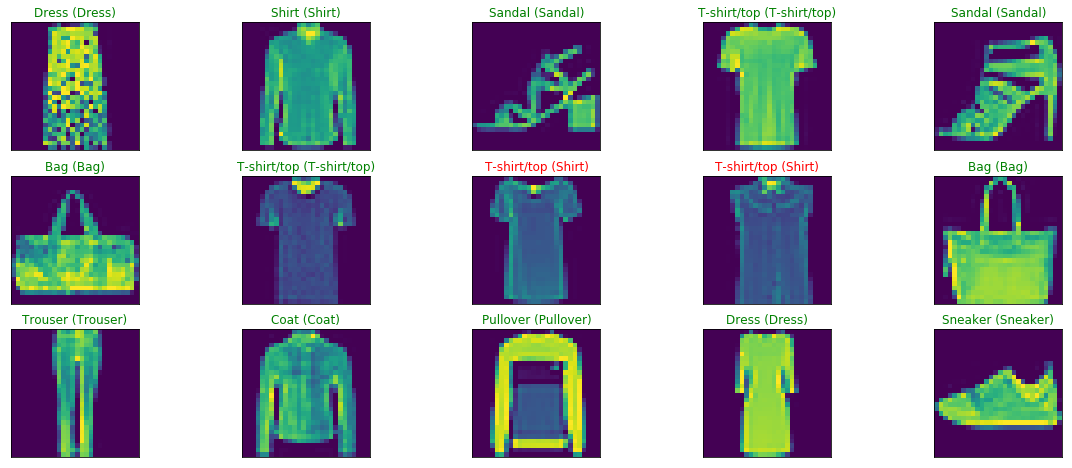

In [11]:
y_hat = model.predict(x_test)

# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(x_test[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = np.argmax(y_test[index])
    # Set the title for each image
    ax.set_title("{} ({})".format(fashion_mnist_labels[predict_index], 
                                  fashion_mnist_labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))

In [1]:
### Now we run the TensorBaord

In [9]:
#Automatic loading of tensorboard in Colab
if IN_COLAB:
    %tensorboard --logdir logs/fit

#### Local:

Now run the following command on a bash

```bash
$ tensorboard --logdir=/tmp/tensorflow_logs
```
Then open the browser(Chrome) and insert this address

```bash
localhost:6006
```